# **Analysis of COVID in Prince George's County, Maryland**

**Author** *Beatrix Tran*

## **Objective**

 The objective of this project is to gather and analyze the COVID infected and death cases in Prince George's County (PG), Maryland from March 2020 to current.
 
PG county is one of the biggest counties and is also the one that has the most COVID cases in Maryland. This project gathers multiple real-time statistics from the Maryland Department of Health to inform the public about the current COVID situation of PG county and the severity of the infected cities inside the county
 
To do this, the objective is broken down into three-part:
 
*   Find the correlation between the infected Staff vs. Non-Staff Resident(if any)
*   Analyze and search for the potential trend of the daily cases in PG 
*   Explore and find the correlation among some infectious area of PG (if any)


## **Getting start!**
 
To get ready for this project you should get familiar with some python library. The information about these libraries can be found at:
* [scikit-learn](https://scikit-learn.org/stable/user_guide.html): for model selection regression
* [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide): for data tidying
* [folium](https://python-visualization.github.io/folium/): for geographic visualization
 
### **Additional Required Libraries:**
 
* requests
* json
* pandas
* re
* matplotlib.pyplot
* numpy
* datetime
 
### **Data:**
 
The data for this project are gathered from the current data available at the Maryland Department of Health. For more information about the data, please visit the links below.
 
*   [MD COVID-19 Number of Deaths by Affected Congregate Facility in 7 days](https://coronavirus.maryland.gov/datasets/md-covid-19-number-of-deaths-by-affected-congregate-facility/data)
*   [MD COVID-19 Number of Cases by Affected Congregate Facility in 7 days](https://coronavirus.maryland.gov/datasets/md-covid-19-number-of-cases-by-affected-congregate-facility/data)
*   [MD COVID-19 Cumulative Daily Confirmed Deaths By County](https://coronavirus.maryland.gov/datasets/mdcovid19-confirmeddeathsbycounty/data?orderBy=DATE)
*   [MD COVID-19 Cumulative Daily Confirmed Cases By County](https://coronavirus.maryland.gov/datasets/mdcovid19-casesbycounty)
*   [MD COVID-19 Cumulative Daily Confirmed Cases by Zipcode](https://coronavirus.maryland.gov/datasets/mdcovid19-master-zip-code-cases)

### **Load data**

In [ ]:
!pip install folium
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Util function to get json data from url and convert data to dataframe
def get_data(url):
  json_data = requests.get(url=url) # request url
  content = json.loads(json_data.content) #load data content
  data = []
  #extract relevant information from feature in the json structure to a list of dictionaries
  for i in range(len(content['features'])):
    temp = content['features'][i]
    att = temp['attributes']
    data.append(att)
  #build a table from that dictionary  
  df = pd.DataFrame.from_dict(data)
  return df

In [3]:
#get data from url
url_cases = 'https://opendata.arcgis.com/datasets/4dd7afed5b9946f282abc4d8b03ce5f8_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
url_deaths = 'https://opendata.arcgis.com/datasets/ca12954794ce41fe9028640aa2315afd_0/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
url_zipcode = 'https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MDCOVID19_MASTER_ZIP_CODE_CASES/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
url_daily_cases = 'https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MDCOVID19_CasesByCounty/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
url_daily_deaths =  'https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MDCOVID19_ConfirmedDeathsByCounty/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'
url_geo_zip = 'https://opendata.arcgis.com/datasets/046ba81433b94c0d90465adec040de1a_4.geojson'
url_geo = 'https://geodata.md.gov/imap/rest/services/Boundaries/MD_PoliticalBoundaries/FeatureServer/4/query?where=1%3D1&outFields=*&outSR=4326&f=json'
#raw_cases = get_data(url=url_cases)
#raw_deaths = get_data(url=url_deaths)
raw_zip_cases = get_data(url=url_zipcode)
raw_daily_deaths = get_data(url=url_daily_deaths)
raw_daily_cases = get_data(url=url_daily_cases)
raw_geo = get_data(url=url_geo)

### **Simple cleaning and pre-processing data**
Raw data sometimes was encoded or simply doesn't make sense. In this section, we will focus on making the data somewhat readable


In [4]:
raw_geo= raw_geo.loc[(raw_geo['ZIPCODE1'] >= '20607') & (raw_geo['ZIPCODE1'] <= '20792')]# Select only the zipcode the belong or partialy belong to PG county
raw_geo.head()

OBJECTID ZIPCODE1    ZIPName
5         6    20607   Accokeek
6         7    20608    Aquasco
7         8    20609     Avenue
8         9    20611  Bel Alton
9        10    20612   Benedict

In [5]:
print("Raw MD COVID-19 Cases by Zipcode")
#Select only the zipcode the belong or partialy belong to PG county
raw_zip_cases = raw_zip_cases.loc[(raw_zip_cases['ZIP_CODE'] >= '20607') & (raw_zip_cases['ZIP_CODE'] <= '20792')]
raw_zip_cases = raw_zip_cases.drop(['OBJECTID'], axis=1)
raw_zip_cases = raw_zip_cases.fillna(0) #replace nan with 0
raw_zip_cases.head()

Raw MD COVID-19 Cases by Zipcode


F4_11_2020  F4_12_2020  F4_13_2020  F4_14_2020  F4_15_2020  F4_16_2020  \
12        22.0        23.0        23.0        25.0        25.0        27.0   
13         0.0         0.0         0.0         0.0         0.0         0.0   
14         0.0         0.0         0.0         0.0         0.0         0.0   
15         0.0         0.0         0.0         0.0         0.0         0.0   
16         0.0         0.0         0.0         0.0         0.0         0.0   

    F4_17_2020  F4_18_2020  F4_19_2020  F4_20_2020  ...  total07_26_2020  \
12        28.0        28.0        31.0        32.0  ...            148.0   
13         0.0         0.0         0.0         0.0  ...              0.0   
14         0.0         0.0         0.0         0.0  ...              0.0   
15         0.0         0.0         0.0         0.0  ...              0.0   
16         0.0         0.0         0.0         0.0  ...              0.0   

    total07_27_2020  total07_28_2020  total07_29_2020  total07_30_2020  \
12            150.0            152.0            156.0            158.0   
13              0.0              0.0              0.0              0.0   
14              0.0              0.0              0.0              0.0   
15              0.0              0.0              0.0              0.0   
16              0.0              0.0              0.0              0.0   

    total07_31_2020  total08_01_2020  total08_02_2020  total08_03_2020  \
12            159.0            161.0            165.0            168.0   
13              0.0              0.0              0.0              0.0   
14              0.0              0.0              0.0              0.0   
15              0.0              0.0              0.0              0.0   
16              0.0              0.0              0.0              0.0   

    total08_04_2020  
12            168.0  
13              0.0  
14              0.0  
15              0.0  
16              0.0  

[5 rows x 117 columns]

In [6]:
print("Raw MD COVID-19 Confirmed Deaths By County")
raw_daily_deaths = raw_daily_deaths.drop(['OBJECTID'], axis=1) #droped the OBJECTID column
raw_daily_deaths = raw_daily_deaths.fillna(0)
raw_daily_deaths.head()

Raw MD COVID-19 Confirmed Deaths By County


DATE  Allegany  Anne_Arundel  ...  Wicomico  Worcester  Unknown
0  1585922400000         0             4  ...         1          0      0.0
1  1586008800000         0             6  ...         1          0      0.0
2  1586095200000         0             6  ...         1          0      0.0
3  1586181600000         0             8  ...         1          0      0.0
4  1586268000000         0             8  ...         1          0      0.0

[5 rows x 26 columns]

In [7]:
print("Raw MD COVID-19 Confirmed Cases By County")
raw_daily_cases = raw_daily_cases.drop(['OBJECTID'], axis=1)
raw_daily_cases = raw_daily_cases.fillna(0)
raw_daily_cases.head()

Raw MD COVID-19 Confirmed Cases By County


DATE  Allegany  Anne_Arundel  ...  Wicomico  Worcester  Unknown
0  1584280800000       0.0             2  ...       0.0        0.0      0.0
1  1584367200000       0.0             1  ...       0.0        0.0      0.0
2  1584453600000       0.0             3  ...       0.0        0.0      0.0
3  1584540000000       0.0             4  ...       0.0        0.0      0.0
4  1584626400000       0.0             5  ...       0.0        0.0      0.0

[5 rows x 26 columns]

In [8]:
print("Raw MD COVID-19 - Number of Deaths by Affected Congregate Facility")
raw_deaths = raw_deaths.loc[raw_deaths['COUNTY'] == "Prince George's"] #select only cases belong to PG county
raw_deaths.head()

Raw MD COVID-19 - Number of Deaths by Affected Congregate Facility


DATE  ... OBJECTID
136  4/29/2020  ...      136
185  4/29/2020  ...      185
186  4/29/2020  ...      186
187  4/29/2020  ...      187
188  4/29/2020  ...      188

[5 rows x 10 columns]

In [9]:
print("Raw MD COVID-19 - Number of Deaths by Affected Congregate Facility")
raw_deaths = raw_deaths.loc[raw_deaths['COUNTY'] == "Prince George's"] #select only cases belong to PG county
raw_cases.head()

Raw MD COVID-19 - Number of Deaths by Affected Congregate Facility


DATE  ... OBJECTID
0  4/29/2020  ...        0
1  4/29/2020  ...        1
2  4/29/2020  ...        2
3  4/29/2020  ...        3
4  4/29/2020  ...        4

[5 rows x 27 columns]

### **Further processing data**
In this section, the data is further manipulated to get or create only relevant information

In [6]:
#Creating empty data frame
cases = pd.DataFrame()
deaths = pd.DataFrame()
zip_cases = pd.DataFrame()

In the raw COVID-19 Cases by Zipcode (**raw_zip_cases**), the date was used as the header for each column and was in string format that doesn't really make sense at the first glance (exp: F4_15_2020). We will use **regex** to reformat the date for understandability and further analysis

In [7]:
import re #regex
l = list(raw_zip_cases) #list of column headers
res = []
for elem in l:
  temp = re.split(r'(\d.*)', elem) #split at the 1st digit (F4_15_2020 -> ['F', '4_15_2020', ''])
  if len(temp) < 2:
    res.append(temp[0]) #append the first element (aka Zipcode)
  else:
    _,date,_ = temp
    date = date.replace("_","/") #re fomatting (4_15_2020 -> 4/15/2020)
    res.append(date)

In [8]:
raw_zip_cases.columns = res #set column headers as dates
zip_cases = raw_zip_cases.drop(['ZIP_CODE'], axis=1).T.reset_index(drop=True) # transpose the table
zip_cases.columns = raw_zip_cases['ZIP_CODE'].tolist() # Use zipcode as column header
zip_cases.insert(0, 'Date', res[1:]) # created a date column
zip_cases.head()

Date  20607  20608  20609  20611  20612  20613  20615  20616  20617  \
0  4/12/2020   22.0    0.0    0.0    0.0    0.0   37.0    0.0    0.0    0.0   
1  4/13/2020   23.0    0.0    0.0    0.0    0.0   40.0    0.0    0.0    0.0   
2  4/14/2020   23.0    0.0    0.0    0.0    0.0   43.0    0.0    0.0    0.0   
3  4/15/2020   25.0    0.0    0.0    0.0    0.0   43.0    0.0    0.0    0.0   
4  4/16/2020   25.0    0.0    0.0    0.0    0.0   44.0    0.0    0.0    0.0   

   ...  20778  20779  20780  20781  20782  20783  20784  20785  20787  20788  
0  ...    0.0    0.0    0.0   29.0   76.0   97.0   74.0   98.0    0.0    0.0  
1  ...    0.0    0.0    0.0   31.0   83.0  102.0   85.0  103.0    0.0    0.0  
2  ...    0.0    0.0    0.0   31.0   86.0  111.0   98.0  112.0    0.0    0.0  
3  ...    0.0    0.0    0.0   32.0   93.0  127.0  102.0  117.0    0.0    0.0  
4  ...    0.0    0.0    0.0   37.0   98.0  154.0  121.0  132.0    0.0    0.0  

[5 rows x 123 columns]

Once the zipcode data is cleaned, we move on to the daily cases and deaths. Notice how the structure of daily cases and daily deaths are very similar. Thus, it's better to have a utility function to process both of them. This function’s purpose is to convert the Unix int64 format to **datetime** object and then format them to **mm/dd/YYYY** format for readability. Then we will apply this function to the unprocessed daily cases (**raw_daily_cases**) and unprocessed daily cases (**raw_daily_deaths**) data

In [13]:
#Util  convert the unix int format to datetime object 
import datetime
def to_dt(data):
  l = []
  for row in data.iterrows():
    # convert to datetime and format to mm/dd/YYYY format (ex: 1584280800000 -> [2020,15,03] -> 03/15/2020)
    l.append(datetime.datetime.fromtimestamp(int(row[1][0]/1000)).strftime("%m/%d/%Y")) 
  return l #return the list of mm/dd/YYYY

In [14]:
raw_daily_cases["DATE"] = to_dt(raw_daily_cases)
raw_daily_cases.head()

DATE  Allegany  Anne_Arundel  ...  Wicomico  Worcester  Unknown
0  03/15/2020       0.0             2  ...       0.0        0.0      0.0
1  03/16/2020       0.0             1  ...       0.0        0.0      0.0
2  03/17/2020       0.0             3  ...       0.0        0.0      0.0
3  03/18/2020       0.0             4  ...       0.0        0.0      0.0
4  03/19/2020       0.0             5  ...       0.0        0.0      0.0

[5 rows x 26 columns]

In [15]:
raw_daily_deaths["DATE"] = to_dt(raw_daily_deaths)
raw_daily_deaths.head()

DATE  Allegany  Anne_Arundel  ...  Wicomico  Worcester  Unknown
0  04/03/2020         0             4  ...         1          0      0.0
1  04/04/2020         0             6  ...         1          0      0.0
2  04/05/2020         0             6  ...         1          0      0.0
3  04/06/2020         0             8  ...         1          0      0.0
4  04/07/2020         0             8  ...         1          0      0.0

[5 rows x 26 columns]

Next, we want to narrow down the information to just PG county to see the trend of COVID and the correlation between cases and deaths in PG county. To do so, we create a utility function to extract the information of deaths and cases for a specific county (this case is PG).  
The variables represented in these two tables are very similar. Thus, we will create another utility function to combine for later analysis


In [16]:
#Util to extract the cases/deaths of a particular county
def case_OR_death_per_county(raw_data, county, case_OR_death):
  data = pd.DataFrame()
  data["Date"] = raw_data["DATE"]#keep the date as in the original data
  data[county + '_' + case_OR_death] = raw_data[county]#select only the county
  return data

#Util to combine the cases/deaths of a particular county
def total_per_county(county):
  daily_deaths = case_OR_death_per_county(raw_daily_deaths, county, 'Deaths')
  daily_cases = case_OR_death_per_county(raw_daily_cases, county, 'Cases')
  data_total_daily = pd.merge(daily_cases, daily_deaths, how="outer", on=["Date"])#using outter merge to combine both data
  data_total_daily = data_total_daily.fillna(0)#convert nan to 0
  return data_total_daily

In [17]:
print("Cumulative Cases and deaths in Prince George's county since 03/15/2020")
data_totalPG_daily = total_per_county('Prince_Georges')
data_totalPG_daily.head()

Cumulative Cases and deaths in Prince George's county since 03/15/2020


Date  Prince_Georges_Cases  Prince_Georges_Deaths
0  03/15/2020                     9                    0.0
1  03/16/2020                    15                    0.0
2  03/17/2020                    14                    0.0
3  03/18/2020                    20                    0.0
4  03/19/2020                    23                    0.0

Once we get the desired cumulative cases and deaths table we can move on to the current 7 days cases and deaths table. To do so, we keep important information such as Date, Cases, Deaths. Then create two extra columns to count the number of staff and non-staff residents infected within the past 7 days

In [18]:
cases["Date"] = raw_cases["DATE"] #keep date
cases["Type"] = raw_cases[""] #keep type
cases["Number_of_Case(s)"] = raw_cases["Prince_George's"] #extract only cases in PG county

In [19]:
import numpy as np
arr = np.zeros(48, dtype=int) #create 0 array that has the same length as the cases data
ind = 0
for row in cases.iterrows():
  if "Staff:" in row[1][1]: #if the word "Staff" is in the type of infected, add it to the array
    arr[ind] = row[1][2]
  ind = 1+ind
cases['Staff_Infected']=arr #create a colum for infected staff
cases = cases.groupby('Date', as_index=False).sum() # sum the number of infected staff by date
cases["Non-Staff_Resident"] = cases['Number_of_Case(s)']-cases['Staff_Infected'] #calculate non-staff infected cases by subtracting the total cases and the infected staff case 
cases

Date  Number_of_Case(s)  Staff_Infected  Non-Staff_Resident
0  4/29/2020                519             204                 315
1  5/13/2020                963             322                 641
2  5/20/2020               1199             382                 817
3  5/27/2020               1349             424                 925
4   5/6/2020                837             276                 561
5  6/10/2020               1412             459                 953
6  6/17/2020                793             242                 551
7   6/3/2020               1540             503                1037

Because the 7 days deaths data is structured different than the cases data. We will create a **SUM** column in the table to keep track of total deaths

In [20]:
raw_deaths = raw_deaths.replace('N/A', 0) #replace N/A value with 0
raw_deaths["SUM"] = raw_deaths.iloc[:,3:9].sum(axis=1) #create a sum column to count total deaths

In [21]:
deaths["Date"] = raw_deaths["DATE"]
deaths["Number_of_Death(s)"] = raw_deaths["SUM"]
#number of death staff is the sum of the 'Staff:_Nursing,_Assisted_Living,_Group_Homes_Affected_Facilities' and 'Staff:_State_and_Local_Affected_Facilities' column
deaths["Staff_Deaths"] = raw_deaths.loc[:,['Staff:_Nursing,_Assisted_Living,_Group_Homes_Affected_Facilities','Staff:_State_and_Local_Affected_Facilities']].sum(axis=1)
deaths = deaths.groupby('Date', as_index=False).sum() # sum the number of deaths staff by date
deaths["Non-Staff_Deaths"] = deaths['Number_of_Death(s)']-deaths['Staff_Deaths'] #calculate non-staff infected deaths by subtracting the total deaths and the deaths staff case
deaths

Date  Number_of_Death(s)  Staff_Deaths  Non-Staff_Deaths
0  4/29/2020                  53             2                51
1  5/13/2020                 147             4               143
2  5/20/2020                 168             4               164
3  5/27/2020                 206             4               202
4   5/6/2020                 120             4               116
5  6/10/2020                 205           201                 4
6  6/17/2020                 108             3               105
7   6/3/2020                 223             5               218

Now we will combine the 7 days infected cases and death to find the correlation of cases and deaths for staff and non-staff members

In [22]:
data_totalPG = pd.concat([cases, deaths.drop(["Date"], axis=1)], axis=1)
data_totalPG['Date'] = pd.to_datetime(data_totalPG['Date'])
data_totalPG = data_totalPG.sort_values(by='Date')
print("Cases and deaths in Prince George's county in 7 days")
data_totalPG

Cases and deaths in Prince George's county in 7 days


Date  Number_of_Case(s)  ...  Staff_Deaths  Non-Staff_Deaths
0 2020-04-29                519  ...             2                51
4 2020-05-06                837  ...             4               116
1 2020-05-13                963  ...             4               143
2 2020-05-20               1199  ...             4               164
3 2020-05-27               1349  ...             4               202
7 2020-06-03               1540  ...             5               218
5 2020-06-10               1412  ...           201                 4
6 2020-06-17                793  ...             3               105

[8 rows x 7 columns]

# **Evaluation**

## **I. Staff vs. Non-Staff-Resident**
The main focus of this part is to find the correlation of infection between congregate facility staff (ie. nurse, doctor, etc.) and nonstaff residents.
 
We will use the **data_totalPG** for this purpose. 
 
Using **matplotlib.pyplot**, let's plot the *Infected cases vs Mortality of Staff* and *Infected cases vs Mortality of Non-Staff Resident* to see how the infection and death cases affect each group individually.


In [23]:
#ultil function to create bar chart to compare two or more catergories
def get_comparison_plot(df, title, x, y):
  fig, ax = plt.subplots() #create subplot
  plt.title(title)
  df.plot.bar(x , y, ax = ax) # plot bar chart
  for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height())) # add anotation

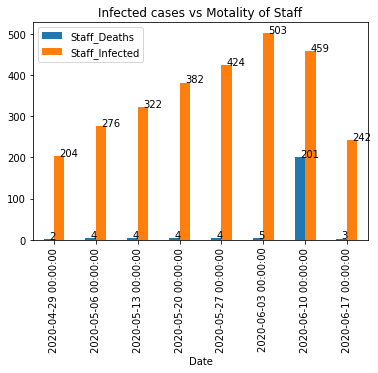

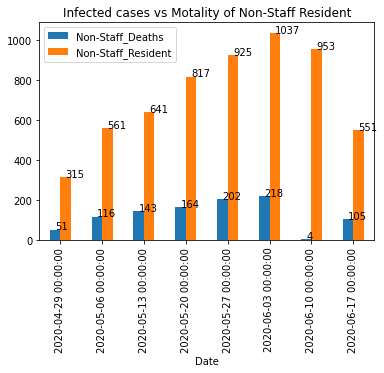

In [24]:
# get comparision plot for Infected cases vs Mortality of Staff and Infected cases vs Mortality of Non-Staff Resident
get_comparison_plot(data_totalPG, "Infected cases vs Motality of Staff", x = 'Date', y = ['Staff_Deaths', 'Staff_Infected'])
get_comparison_plot(data_totalPG, "Infected cases vs Motality of Non-Staff Resident", x = 'Date', y = ['Non-Staff_Deaths', 'Non-Staff_Resident'])

From the above graphs, it seems like there isn't a correlation between death and the infected rate per group. However, there seems to be a linear relationship between the nonstaff and staff infection rate. 
 
We now use the LinearRegression from **sklearn.linear_model** to verify this assumption and see how these two correlated to one another

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
#Util to fit the linear model and get coefficient, intercept, MSE, r2 score
def get_coef_intc(x, y):
  x = x.values.reshape(-1,1) #make sure inpute are in correct shape
  y = y.values.reshape(-1,1)
  #split input into testing and training data
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  #fit training model
  reg1 = LinearRegression().fit(X_train, y_train)
  # The coefficient
  print('Coefficients: ', reg1.coef_.flatten()[0])
  # The intercept
  print('Intercepts: ', reg1.intercept_.flatten()[0])
  # Make predictions using the testing data
  y_pred = reg1.predict(X_test)
  # The mean squared error
  print('Mean squared error(MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination(r2 score): %.2f'
      % r2_score(y_test, y_pred))
  return reg1.coef_.flatten(), reg1.intercept_.flatten()

In [20]:
#Util to plot the fitted line
def plot_fit(x, y, title, xla, yla):
  c, i = get_coef_intc(x, y) # get coefficient and intercept
  plt.title(title)
  #plot data as scatter plot
  plt.scatter(x, y)
  plt.xlabel(xla)
  plt.ylabel(yla)
  #plot fited line using function y = cx + i
  plt.plot(x, i + c*x, 'r', label='fitted line')
  plt.show()

Coefficients:  0.4205710182142624
Intercepts:  43.67971623180205
Mean squared error(MSE): 143.50
Coefficient of determination(r2 score): 0.97


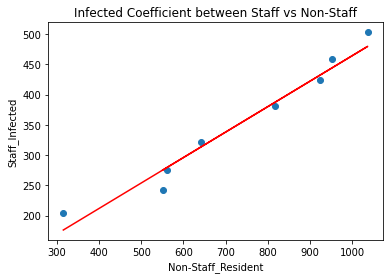

In [27]:
#Fit and Plot Infected cases Staff vs Non-Staff Resident
x = data_totalPG["Non-Staff_Resident"]
y = data_totalPG["Staff_Infected"]
title = "Infected Coefficient between Staff vs Non-Staff"
xla = "Non-Staff_Resident"
yla = "Staff_Infected"
plot_fit(x, y, title, xla, yla)

There is a positive correlation between the infection rate of infected patients and staff. The r2 score is 0.97 means that *97%* of the data can be explained with this model. Their linear relationship is follow the function ***y = 0.42x + 43.68*** . We can also say that approximately there was a staff member get infected for every 44 infected PG residents

## **II. Daily PG county mortality and infection rate**
In this section, we will compare PG against its Maryland neighboring counties: 
 
* Anne Arundel County (east)
* Calvert County (southeast)
* Charles County (south)
* Howard County (north)
* Montgomery County (northwest)
 
We will also attempt to try finding the infection trend and predict infection rate over time
 
First, we will make a **daily_total** table with the information on cases and deaths of PG and its neighboring counties.

In [28]:
print("Cumulative Cases and deaths in Montgomery county since 03/15/2020")
# Use ultil function total_per_county created from the previous part to extract cases of relevant counties
data_totalPG_daily
data_totalMont_daily = total_per_county('Montgomery')
data_totalAnne_daily = total_per_county('Anne_Arundel')
data_totalCalv_daily = total_per_county('Calvert')
data_totalChar_daily = total_per_county('Charles')
data_totalHowa_daily = total_per_county('Howard')
#combine the information 
daily_total = pd.concat([data_totalPG_daily, data_totalMont_daily.drop(["Date"], axis=1),
                         data_totalAnne_daily.drop(["Date"], axis=1),  data_totalCalv_daily.drop(["Date"], axis=1),
                         data_totalChar_daily.drop(["Date"], axis=1), data_totalHowa_daily.drop(["Date"], axis=1)], axis=1, sort=False)
daily_total.head()

Cumulative Cases and deaths in Montgomery county since 03/15/2020


Date  Prince_Georges_Cases  ...  Howard_Cases  Howard_Deaths
0  03/15/2020                     9  ...           0.0            0.0
1  03/16/2020                    15  ...           1.0            0.0
2  03/17/2020                    14  ...           3.0            0.0
3  03/18/2020                    20  ...           8.0            0.0
4  03/19/2020                    23  ...          16.0            0.0

[5 rows x 13 columns]

In [29]:
#separate deaths and cases
l = list(daily_total.drop(["Date"], axis=1))
cs = []
ds = []
for elem in l:
  if "Cases" in elem:
    cs.append(elem)
  else:
    ds.append(elem)

In [30]:
ind = list(range(1, len(daily_total) + 1))
daily_total["Ind"] = ind # add an index column for plotting number of days

Text(0.5, 1.0, 'Daily Cases')

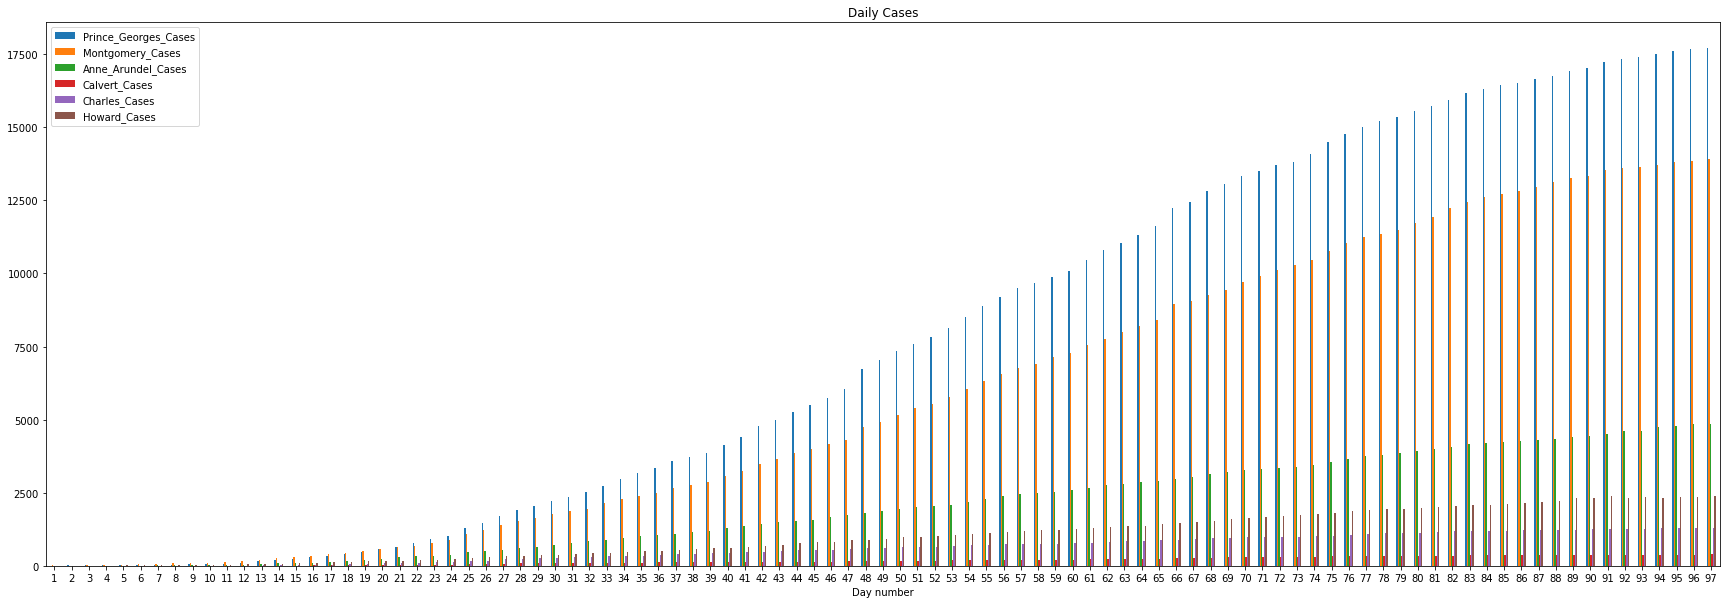

In [31]:
ax = daily_total.plot.bar(x = "Ind", y = cs, rot=0, figsize=(30,10))
ax.set_xlabel("Day number")
plt.title("Daily Cases")

Text(0.5, 1.0, 'Daily Deaths')

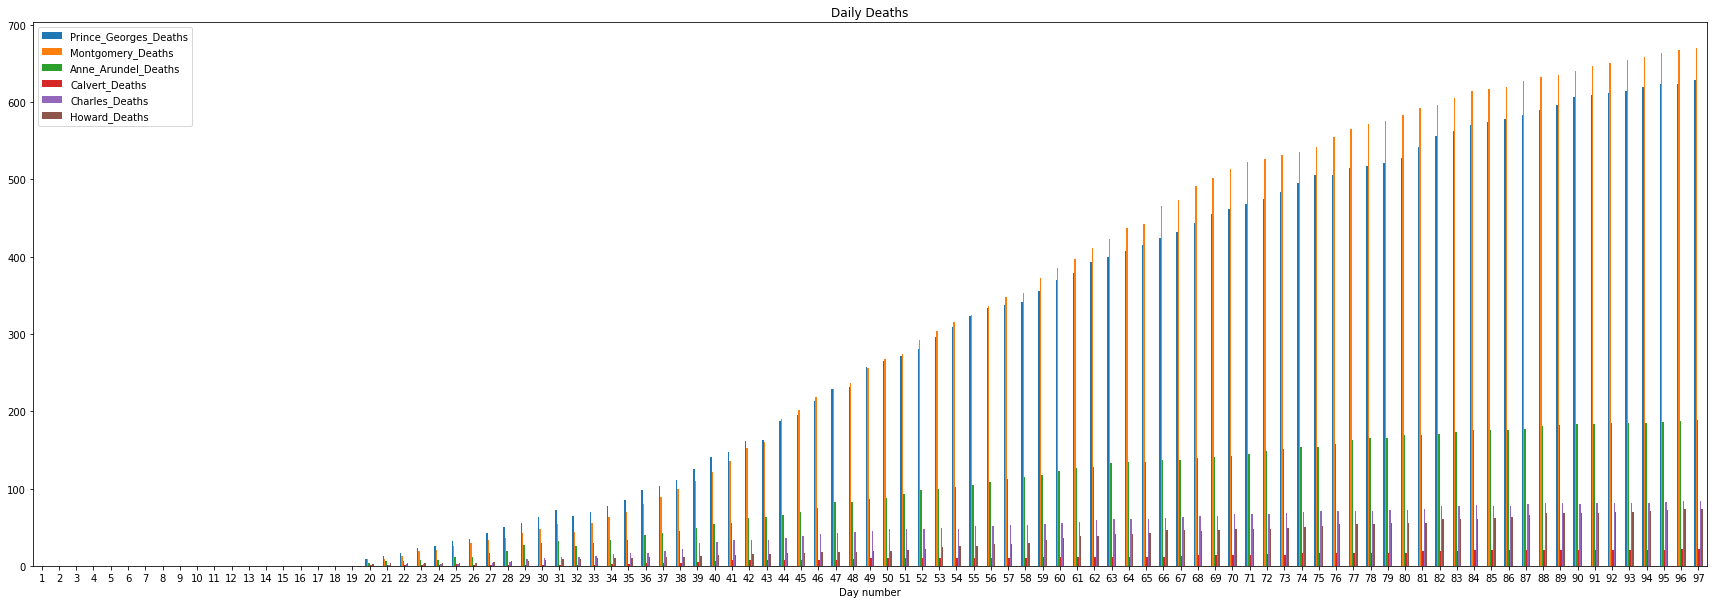

In [32]:
dx = daily_total.plot.bar(x = "Ind", y = ds, rot=0, figsize=(30,10))
dx.set_xlabel("Day number")
plt.title("Daily Deaths")

From the plots, we can see that PG seems to have the most infected cases but not the most infected deaths. Next, let's see if we can find the model for predicting the infectious rate over time
 
From first glance, the relationship between infection cases and time seems to be a non-linear relationship and rather curve. We will apply polynomial regression using **PolynomialFeatures** provided by sklearn to test out this assumption.

Coefficients:  [ 0.00000000e+00 -1.53271722e+02  8.16177961e+00 -4.91131368e-02]
Intercepts:  [646.99684683]
MSE of testing set is 25035.330772228917
R2 score of testing set is 0.99939927512582


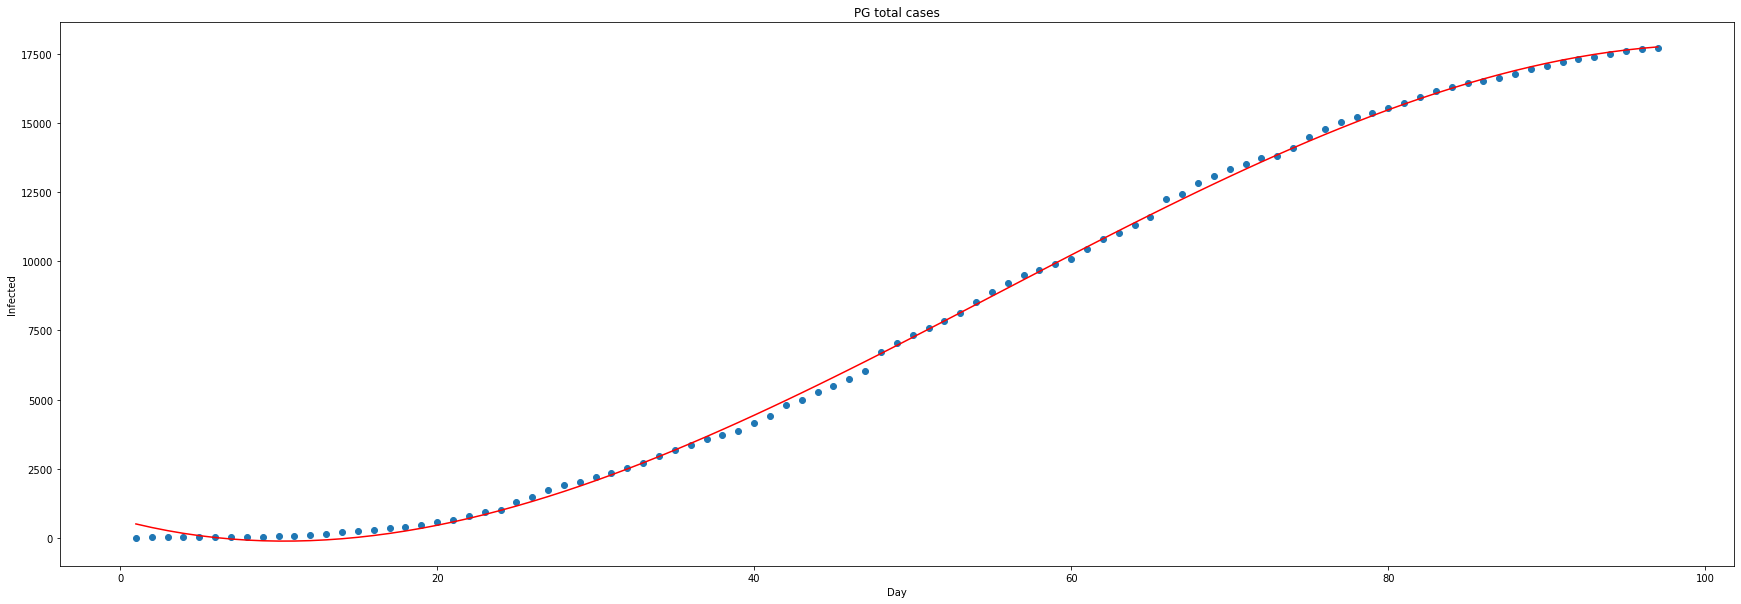

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

deg = 3 # polynomial degree of 3

X = daily_total['Ind'].values.reshape(-1,1) # make sure data have the correct shape
y = daily_total['Prince_Georges_Cases'].values.reshape(-1,1)

#split 80% of data for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#fit training data to polynomial regression model
X_train_poly = PolynomialFeatures(degree=deg).fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression().fit(X_train_poly, Y_train)

# predicting on training data
y_train_predicted = poly_model.predict(X_train_poly)
  
# predicting on test data
y_test_predict = poly_model.predict(PolynomialFeatures(degree=deg).fit_transform(X_test))
  
# evaluating the model on training dataset
mse = mean_squared_error(Y_train, y_train_predicted)
r2 = r2_score(Y_train, y_train_predicted)
  
# evaluating the model on test dataset
mse_test = mean_squared_error(Y_test, y_test_predict)
r2_test = r2_score(Y_test, y_test_predict)

print('Coefficients: ', poly_model.coef_.flatten())
print('Intercepts: ', poly_model.intercept_.flatten())
print("MSE of testing set is {}".format(mse_test))
print("R2 score of testing set is {}".format(r2_test))

#plot the fitted line
x = daily_total["Ind"]
y = daily_total["Prince_Georges_Cases"]
cs = poly_model.coef_.flatten()
is_ = poly_model.intercept_.flatten()
plt.figure(figsize=(30,10))
plt.ylabel('Infected')
plt.xlabel('Day')
plt.title('PG total cases')
plt.scatter(x, y)
plt.plot(x, is_[0] + cs[1]*x + cs[2]*x*x + cs[3]*x*x*x, 'r', label='fitted line')

plt.show()

There is a positive correlation between the infection rate over time. The r2 score is 0.99 means that *99*% of the data can be explained with this model. We can say that the trend of cases over time is follow the function ***y = 646.99684683 + -1.53e+02x +  8.16e+00x^2 + -4.91e-02x^3***

## **III. Exploring the infectous areas of PG county**

In this section, we will explore some infectious cities in PG and see how their infectious rate affect one another.

First, we will create the map with label using mainly **folium** to visually compare the number of cases per city and find cities of interest.

To do so, we will create a table of cumulative infection cases per zipcode. 

In [10]:
print("Total cases in Prince George's county related zipcode since 03/15/2020")
total_zip_cases = pd.DataFrame()
res = zip_cases.columns
total_zip_cases.insert(0, 'Zip_code', res[1:])
row = zip_cases.iloc[-1:]
row = row.drop(["Date"], axis=1).reset_index()
row = row.T[0].tolist()
total_zip_cases.insert(0, 'Total_cases', row[1:])
total_zip_cases.head()

Total cases in Prince George's county related zipcode since 03/15/2020


Total_cases Zip_code
0        168.0    20607
1          0.0    20608
2          0.0    20609
3          0.0    20611
4          0.0    20612

Then we load the geojson data of MD that contain 5 digit zipcode and their boundaries coordinate. Then we store this information to a new JSON file call **updated-file.json**

In [11]:
#load geojson data as json
json_data = requests.get(url=url_geo_zip)
content = json.loads(json_data.content)

In [12]:
# remove ZIP codes not in our dataset
geozips = []
for i in range(len(content['features'])):
    if content['features'][i]["properties"]["ZIPCODE1"] in list(raw_zip_cases['ZIP_CODE'].unique()):
        geozips.append(content['features'][i])

# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# save JSON object as updated-file
open("updated-file.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

15889346

Then we generate the PG geo-map present our data with **choropleth map**. 
We use will use our previously saved JSON file to define the boundaries of each city in this choropleth map. Then we use the zip code and cases from the **total_zip_cases** table to label the map and set the color indicator for cases per zip code

In [13]:
import folium
# create a PG county geo map
m = folium.Map(location = [38.6049, -76.8721], prefer_canvas=True, zoom_start = 9)

In [14]:
md_geo = r'updated-file.json' # open file
choropleth = folium.Choropleth( # use Choropleth to color map of PG
    geo_data=md_geo, # choose geo data
    name='choropleth',
    data=total_zip_cases, # choose data
    columns=['Zip_code', 'Total_cases'], # use Zip_code', 'Total_cases' column of data as indecator for color
    key_on='feature.properties.ZIPCODE1', # search of zipcode properties of the geo data
    fill_color='PuRd',
    fill_opacity=1.0,
    line_opacity=0.5,
    legend_name='COVID Cases in Prince Georges County ',
).add_to(m)

folium.LayerControl().add_to(m) # add layer control to map

# Display Regional Label
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['ZIPName'], style=style_function, labels=False))
folium.LayerControl().add_to(m)
# save map as html
m.save(outfile = 'Feature_map.html')

In [15]:
m

This is the map of infectious rate of PG rank by case from 0 to 2000. The darker the color, the higer the cases.

From this map, we can see that most cases are appear in the north area of PG. Let's have a closer look of these areas

There are three places in these area that stand out the most:

*    College Park is the one that has the least infected cases. 

*    Lanham is the one that has the second most infected cases. 
* Hyattsville is the one that has the most infected cases.



It's interesting because these three counties are very close to one another and have very different infection rates. Let's see how their infectious rate affects one another.
 
To do so, we will create a new table for cases in Hyattsville, College Park, and Lanham. Then we plot the fitted line for each city vs one another and see how they are correlated.

In [16]:
Lanham = []
Hyattsville = []
College_Park = []
# get the zip code of each city from the raw_geo data
for row in raw_geo.iterrows():
  if 'College Park' in row[1][2]:
    College_Park.append(row[1][1])
  if 'Hyattsville' in row[1][2]:
    Hyattsville.append(row[1][1])
  if 'Lanham' in row[1][2]:
    Lanham.append(row[1][1])

In [17]:
h_cases = zip_cases[Hyattsville].sum(axis=1) #count total cases per city
l_cases = zip_cases[Lanham].sum(axis=1)
c_cases = zip_cases[College_Park].sum(axis=1)
hcl = pd.DataFrame()
hcl['Hyattsville'] = h_cases
hcl['College_Park'] = c_cases
hcl['Lanham'] = l_cases
ind = list(range(1, len(h_cases) + 1 ))
hcl.insert(0, 'Day', ind) # created a number of day column
hcl.head()

Day  Hyattsville  College_Park  Lanham
0    1        374.0          34.0   120.0
1    2        404.0          35.0   143.0
2    3        438.0          39.0   153.0
3    4        471.0          41.0   162.0
4    5        542.0          43.0   172.0

Text(0.5, 1.0, 'Hyattsville vs College_Park vs Lanham')

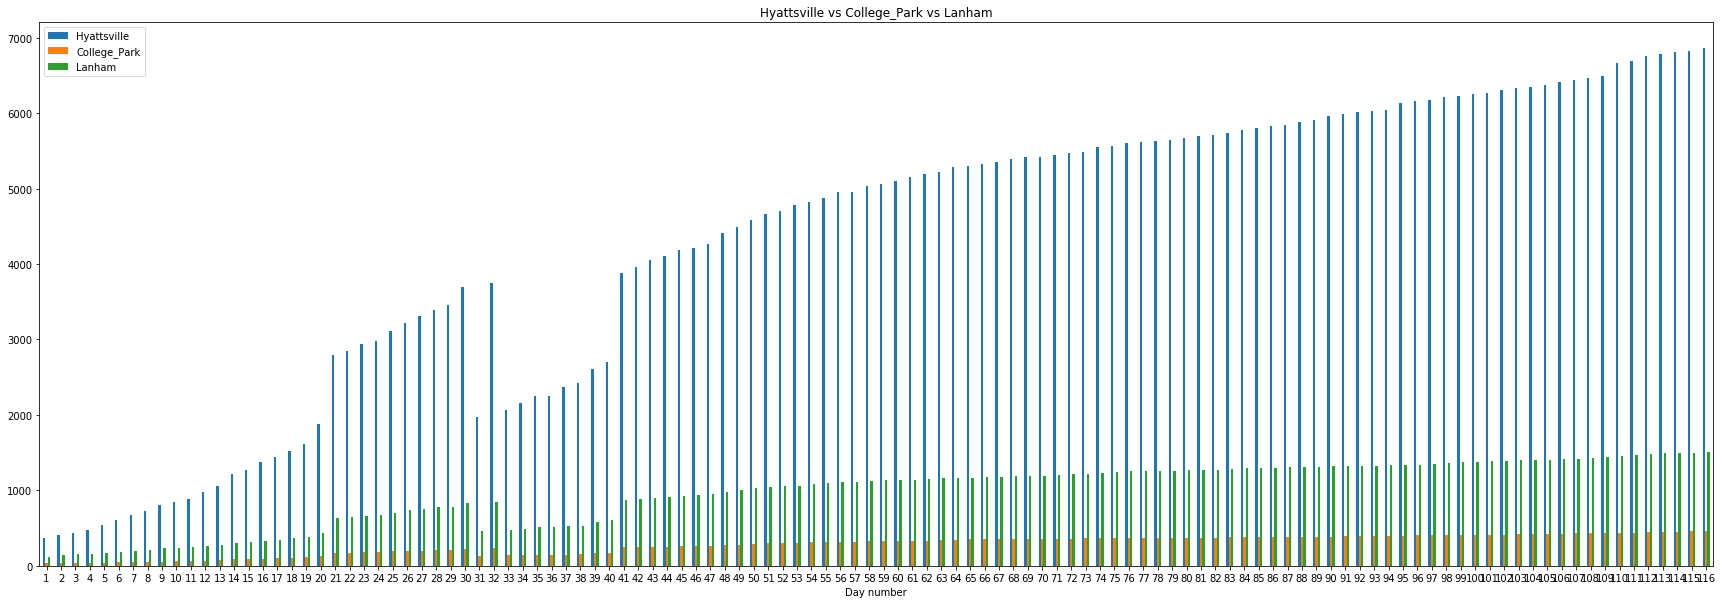

In [18]:
#bar plot
ax = hcl.plot.bar(x = "Day", y = list(hcl.drop(['Day'], axis=1)), rot=0, figsize=(30,10))
ax.set_xlabel("Day number")
plt.title("Hyattsville vs College_Park vs Lanham")

From the above plot, we can see clearly how the infection cases are different from one city to another. Despite this level of differences, all three cities seem to follow the trend that was generally applied for PG (which we calculated previously). 

Notice that they also seem to have a linear relationship. Let's plot the linear model to then and see how one cities cases affect one another

Coefficients:  0.06503793967040168
Intercepts:  0.05970675336516251
Mean squared error(MSE): 55.70
Coefficient of determination(r2 score): 1.00


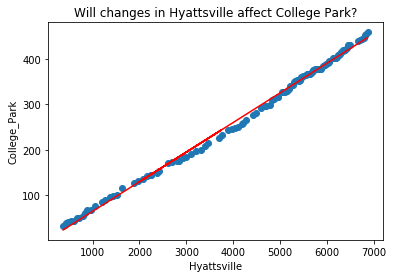

In [23]:
x = hcl['Hyattsville']
y = hcl['College_Park']
title = "Will changes in Hyattsville affect College Park?"
xla = 'Hyattsville'
yla = 'College_Park'
plot_fit(x, y, title, xla, yla)

Coefficients:  15.32927526652191
Intercepts:  12.22257283377985
Mean squared error(MSE): 13346.96
Coefficient of determination(r2 score): 1.00


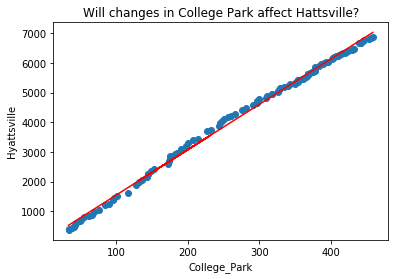

In [24]:
x = hcl['College_Park']
y = hcl['Hyattsville']
title = "Will changes in College Park affect Hattsville?"
xla = 'College_Park'
yla = 'Hyattsville'
plot_fit(x, y, title, xla, yla)

Coefficients:  3.2748326468349767
Intercepts:  45.674060504617614
Mean squared error(MSE): 552.26
Coefficient of determination(r2 score): 1.00


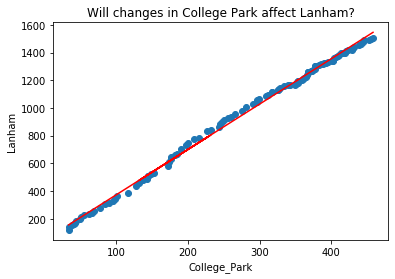

In [25]:
x = hcl['College_Park']
y = hcl['Lanham']
title = "Will changes in College Park affect Lanham?"
xla = 'College_Park'
yla = 'Lanham'
plot_fit(x, y, title, xla, yla)

Coefficients:  0.21358191021957845
Intercepts:  43.2836820194409
Mean squared error(MSE): 82.76
Coefficient of determination(r2 score): 1.00


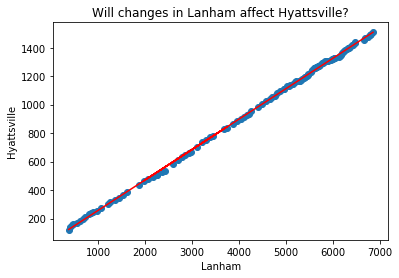

In [26]:
x = hcl['Hyattsville']
y = hcl['Lanham']
title = "Will changes in Lanham affect Hyattsville?"
xla = 'Lanham'
yla = 'Hyattsville'
plot_fit(x, y, title, xla, yla)

Coefficients:  4.679455893549016
Intercepts:  -200.13536416365605
Mean squared error(MSE): 1828.50
Coefficient of determination(r2 score): 1.00


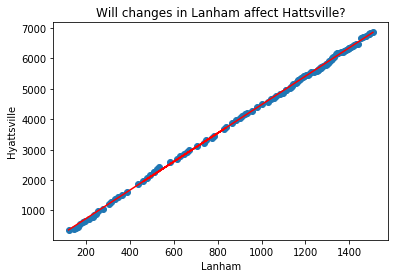

In [27]:
x = hcl['Lanham']
y = hcl['Hyattsville']
title = "Will changes in Lanham affect Hattsville?"
xla = 'Lanham'
yla = 'Hyattsville'
plot_fit(x, y, title, xla, yla)

As expected, the high r2 score could means that our linear models can be used to explain the cases in each city. Each of them have a unique linear relationship to another that follow the equation y = their_coefficient*x + their_ntercept, where their_coefficient and their_ntercept can be found above

# **Conclusion and limitation**
 
From the data analysis, we can say that the number of COVID patients or nonstaff residents is one of the main drivers for the COVID cases of staff in congregate facilities. To be more specific, their relationship shows that approximately there is an infected staff for every 44 infected residents.
However, the data for this evaluation is very small (only 7 days). Thus, it might not be good enough to predict the future trend between staff and resident cases. 
 
From the second part of the analysis, we can visually see how different cases in PG compare to other counties. We also predicted the trend COVID for PG with the current data set. Even though the data set is currently small, the data will expand over time and the model can become more accurate. As it is now, we can still see the trend of COVID case still increase but not as much as before. 
Another limitation of this data is due to the slow testing response in the beginning which might invalidate the actual number of cases in March and affect the prediction accuracy
 
From the third part of this analysis, we can see that the COVID trend in the city generally follows the trend of the county. How ever, the actual infected rate per city varies. This variation might due to many factors like social distancing, ages, population density, gender. For example, College Park consists of many young adults and students and also has an early response to social distancing (school closed in March, curfew started in April). This might be one of the reasons why the city has lower infected cases. More studies will need to be done to evaluate how these factors affect each city.

**Message from author** I hope you find this tutorial/analysis helpful. Stay safe and stay social distancing